# Marketing Analytics For E-Commerce Market Place Company

Business Context:
The client is one of the leading online market place in India and would like partner with Analytixlabs.
Client wants help in measuring, managing and analysing performance of business.
Analytixlabs has hired you as an analyst for this project where client asked you to provide data
driven insights about business and understand customer, seller behaviors, product behavior and
channel behavior etc...
While working on this project, you are expected to clean the data (if required) before analyze it.
Available Data:
Data has been provided for the period of Sep 2016 to Oct 2018 and the below is the data model.
Tables:
Customers: Customers information
Sellers: Sellers information
Products: Product information
Orders: Orders info like ordered, product id, status, order dates etc..
Order_Items: Order level information
Order_Payments: Order payment information
Order_Review_Ratings: Customer ratings at order level
Geo-Location: Location details

Business Objective:

The below are few Sample business questions to be addressed as part of this analysis. However this
is not exhaustive list and you can add as many as analysis and provide insights on the same.

1. Perform Detailed exploratory analysis
    
    a. Define & calculate high level metrics like (Total Revenue, Total quantity, Total
    products, Total categories, Total sellers, Total locations, Total channels, Total
    payment methods etc…)
    
    b. Understanding how many new customers acquired every month
    
    c. Understand the retention of customers on month on month basis
    
    d. How the revenues from existing/new customers on month on month basis
    
    e. Understand the trends/seasonality of sales, quantity by category, location, month,
    week, day, time, channel, payment method etc…
    
    f. Popular Products by month, seller, state, category.
    
    g. Popular categories by state, month
    
    h. List top 10 most expensive products sorted by price

2. Performing Customers/sellers Segmentation
    
    a. Divide the customers into groups based on the revenue generated
    
    b. Divide the sellers into groups based on the revenue generated

3. Cross-Selling (Which products are selling together)
Hint: We need to find which of the top 10 combinations of products are selling together in
each transaction. (combination of 2 or 3 buying together)

4. Payment Behaviour

    a. How customers are paying?

    b. Which payment channels are used by most customers?

5. Customer satisfaction towards category & product
    
    a. Which categories (top 10) are maximum rated & minimum rated?

    b. Which products (top10) are maximum rated & minimum rated?
    
    c. Average rating by location, seller, product, category, month etc.



    Data Model:(shown Below)

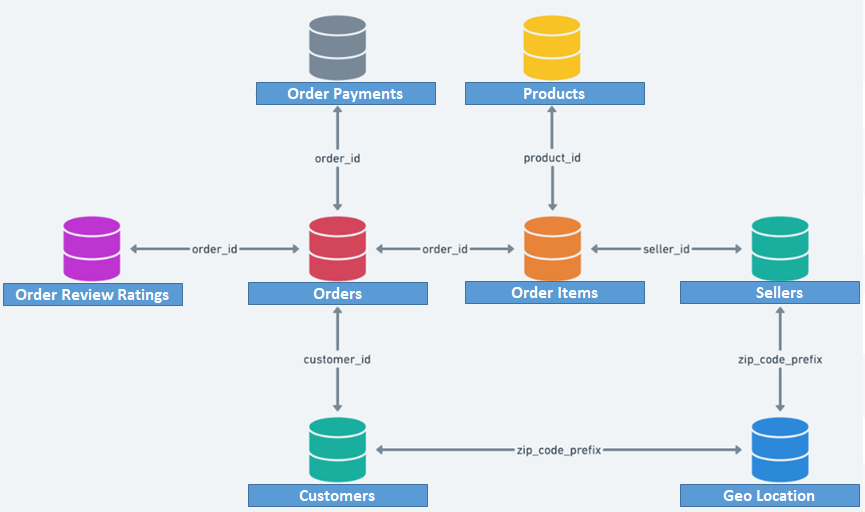

In [25]:
from IPython.display import Image
Image(filename='Data_model.jpg')

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
from sqlalchemy_utils import database_exists, create_database
%matplotlib inline
import sys

First merge all the datasetes and create a combined data set

In [27]:
orders,payments,order_item,order_rating,customer,product,seller,geolocation = pd.read_csv("ORDERS.csv"),pd.read_csv("ORDER_PAYMENTS.csv"),pd.read_csv("ORDER_ITEMS.csv"),pd.read_csv("ORDER_REVIEW_RATINGS.csv"),pd.read_csv("CUSTOMERS.csv"),pd.read_csv("PRODUCTS.csv"),pd.read_csv("SELLERS.csv"),pd.read_csv("GEO_LOCATION.csv")



# geolocation

In [28]:
from functools import reduce


combined  = reduce(lambda main,sub : pd.merge(main,sub,on=["order_id"]),[orders,order_item,order_rating,payments])


In [29]:
combined = combined.merge(product,on=["product_id"])

In [30]:
combined = combined.merge(seller,on=["seller_id"])

In [31]:
combined = combined.merge(customer,on=["customer_id"])

In [32]:
del orders,payments,order_item,order_rating,customer,product,seller,geolocation

In [33]:
combined.dtypes

order_id                          object
customer_id                       object
order_status                      object
order_purchase_timestamp          object
order_approved_at                 object
order_delivered_carrier_date      object
order_delivered_customer_date     object
order_estimated_delivery_date     object
order_item_id                      int64
product_id                        object
seller_id                         object
shipping_limit_date               object
price                            float64
freight_value                    float64
review_id                         object
review_score                       int64
review_creation_date              object
review_answer_timestamp           object
payment_sequential                 int64
payment_type                      object
payment_installments               int64
payment_value                    float64
product_category_name             object
product_name_lenght              float64
product_descript

In [34]:
combined.order_status.unique()
sys.getsizeof(combined)

202709922

We are changing the following values:

delivered    = 0

invoiced     = 1

shipped      = 2

processing   = 3

canceled     = 4

approved     = 5

unavailable  = 6


and we will change the dtype of order_status  to uint8 to save the memory

In [35]:
combined["order_status"] =combined["order_status"].replace(combined.order_status.unique(),[0,1,2,3,4,5,6]).astype("uint8")


In [36]:
combined.review_score = combined.review_score.astype("uint8")
combined.order_item_id = combined.order_item_id.astype("uint8")
combined.payment_sequential = combined.payment_sequential.astype("uint8")
combined.payment_installments = combined.payment_installments.astype("uint8")
# combined.zip_code_prefix = combined.zip_code_prefix.astype("uint32")
# combined.payment_value.max()

In [37]:
combined["order_purchase_timestamp"] = pd.to_datetime(combined["order_purchase_timestamp"])
combined["order_approved_at"] = pd.to_datetime(combined["order_approved_at"])
combined["order_delivered_carrier_date"] = pd.to_datetime(combined["order_delivered_carrier_date"])
combined["order_delivered_customer_date"] = pd.to_datetime(combined["order_delivered_customer_date"])
combined["order_estimated_delivery_date"] = pd.to_datetime(combined["order_estimated_delivery_date"])
combined["order_approved_at"] = pd.to_datetime(combined["order_approved_at"])
combined["review_creation_date"] = pd.to_datetime(combined["review_creation_date"])
combined["review_answer_timestamp"] = pd.to_datetime(combined["review_answer_timestamp"])
combined["shipping_limit_date"] = pd.to_datetime(combined["shipping_limit_date"])
# combined["order_purchase_timestamp"].apply(pd.to_datetime())

In [38]:
combined.dtypes

order_id                                 object
customer_id                              object
order_status                              uint8
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
order_item_id                             uint8
product_id                               object
seller_id                                object
shipping_limit_date              datetime64[ns]
price                                   float64
freight_value                           float64
review_id                                object
review_score                              uint8
review_creation_date             datetime64[ns]
review_answer_timestamp          datetime64[ns]
payment_sequential                        uint8
payment_type                             object
payment_installments                    

In [39]:
combined.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                  15
order_delivered_carrier_date     1254
order_delivered_customer_date    2588
order_estimated_delivery_date       0
order_item_id                       0
product_id                          0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
review_id                           0
review_score                        0
review_creation_date                0
review_answer_timestamp             0
payment_sequential                  0
payment_type                        0
payment_installments                0
payment_value                       0
product_category_name            1734
product_name_lenght              1709
product_description_lenght       1709
product_photos_qty               1709
product_weig

entered the consolide datav in to sql


In [40]:
# from sqlalchemy import create_engine
# from sqlalchemy_utils import database_exists, create_database
# # import sqlalchemy
# engine = create_engine('postgresql+psycopg2://postgres:passs\
# @localhost/marketing_analytics')

# if not database_exists(engine.url):
#     create_database(engine.url)

# print(database_exists(engine.url))
# combined.to_sql("marketing",con=engine)

In [41]:
# import sys
sys.getsizeof(combined)

131766926

Here we have reduced the data from 156 MB to 91 MB which will increase our performance

Total Revenue will be the sum of payment value where order status is delivered(0)

In [42]:
combined.payment_value[combined["order_status"]==0].sum()

19883390.68

Total Revenue is Rs 1,88,61,303.4

Total Quantity of products sold 
To find out this we have 2 ways :-
1. Simple Approach (might have less bussiness significance) ["count the total products sold discarding whether they were canceled or not"]
2. My Approach (Might make more sense to a bussiness) ["count the products sold only for those products which were delivered"]

In [43]:
combined[combined["order_status"]==0].drop_duplicates(subset=["order_id","product_id"]).product_id.count()

100195

Total Products sold are 94,943

<AxesSubplot:xlabel='product_category_name'>

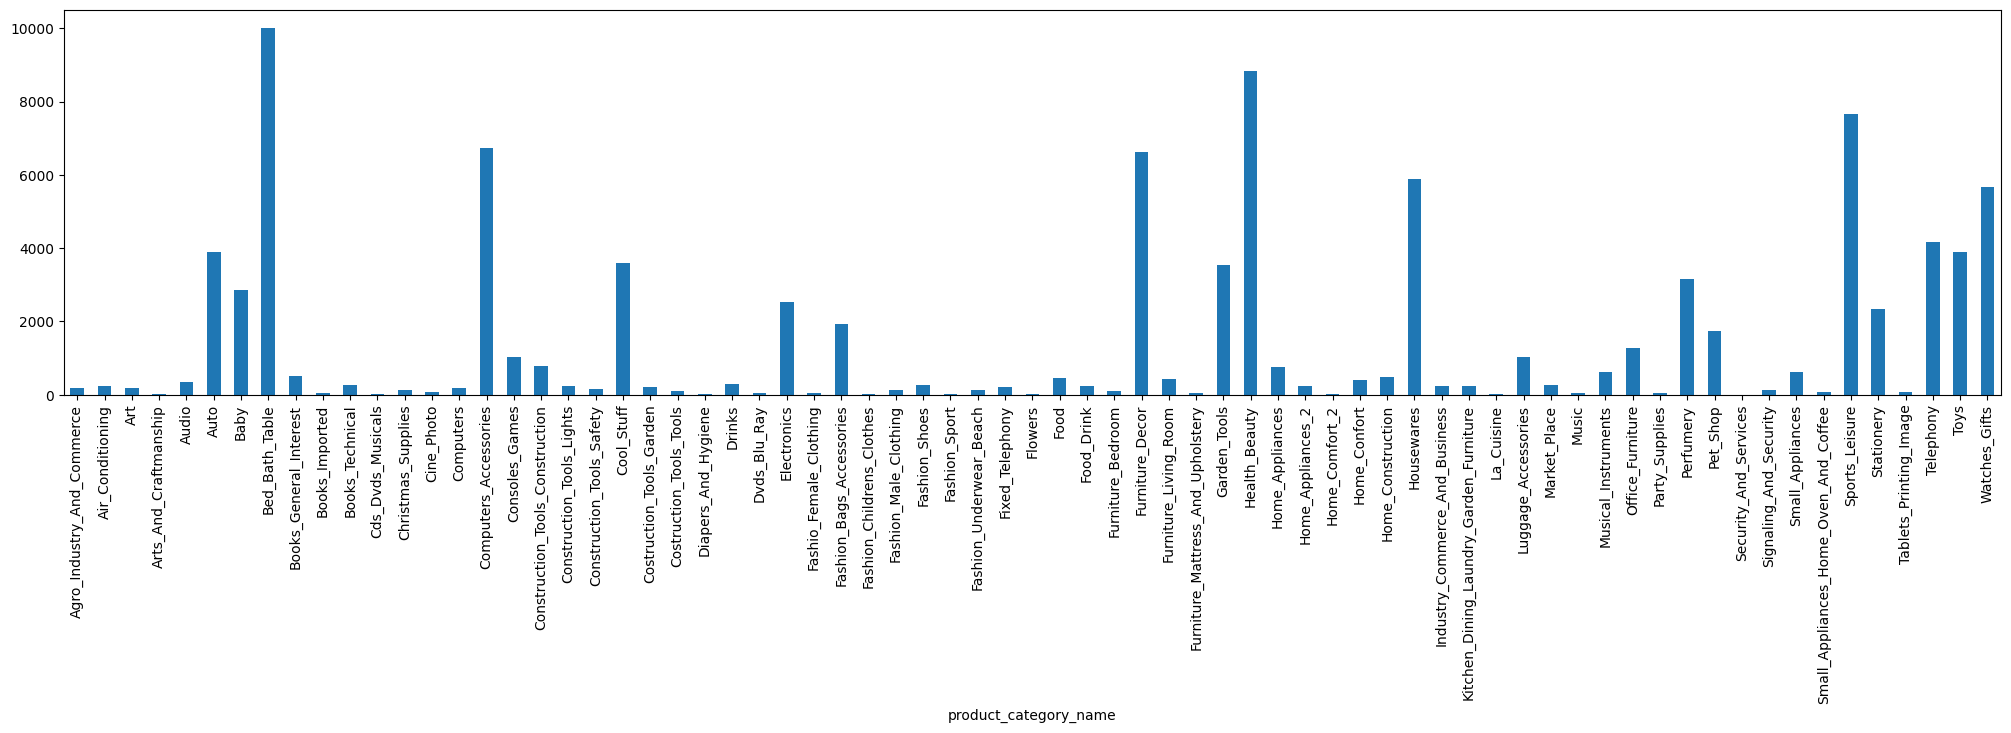

In [44]:
combined[combined["order_status"]==0].drop_duplicates(subset=["order_id","product_id"]).groupby(by=["product_category_name"])["product_id"].count().plot(kind = "bar",figsize=(25,5))

In [50]:
combined.product_category_name.unique().shape

(72,)

We have 72 product categories

In [52]:
combined.seller_id.unique().shape

(3095,)

we have 3095 different sellers

In [56]:
combined.customer_city.unique().shape

(4110,)

we have customers from 4110 different cites 

In [66]:
combined[combined["order_status"]==0].drop_duplicates(subset=["customer_id"]).groupby(by=["customer_city"])["customer_id"].count().sort_values().tail(5)

customer_city
Anakapalle       1489
Eddumailaram     2071
Anantapur        2697
Badepalle        6601
Akkarampalle    15045
Name: customer_id, dtype: int64

top 5 cites with maximum customers are mentioned above. Akkarampalle  is the city with most customers

In [68]:
combined[combined["order_status"]==0].drop_duplicates(subset=["seller_id"]).groupby(by=["seller_city"])["seller_id"].count().sort_values().tail(5)

seller_city
Chirala          51
Anantapur        65
Badepalle        93
Anakapalle      124
Akkarampalle    666
Name: seller_id, dtype: int64

top 5 cites with maximum seller are mentioned above. Akkarampalle  is the city with most customers

In [70]:
combined.payment_type.unique()

array(['credit_card', 'voucher', 'UPI', 'debit_card'], dtype=object)

there are 4 different type of payment methods credit card, voucher ,upi ,debit card

<AxesSubplot:xlabel='payment_type'>

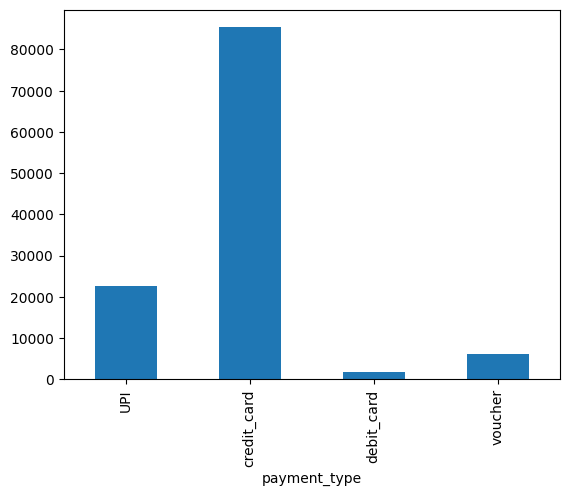

In [72]:
combined[combined["order_status"]==0].groupby(by=["payment_type"])["seller_id"].count().plot(kind="bar")

credit card is the most popular type of payments